# Project: Exploring correlations between types of economic activity and GDP

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The present work aims to shed light on the relationship between types of economic activity and the wealth of 21st century nations in general and of Argentina in particular. It has become commonplace for politicians in Argentina to claim that the Argentine economy is based on agricultural activities and that a shift to industrial activity is needed for the country to become wealthier. It is an objective of this work to determine whether this assertion is compatible with the results of an analysis of the available data.

The data selected for our analysis consist on four datasets from GapMinder (www.gapminder.org). Three of them are of the percentages of the GDP of countries around the world which are based in agricultural, industrial and services-based activity. The fourth dataset involves data about the GDP per capita of countries around the world. GDP per capita has been selected as the measure of wealth to be used in the context of this analysis.

In [1]:
# First, the needed packages are imported. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the datasets for analysis.

The datasets has been downloaded from https://www.gapminder.org/data/.

In the following cell, we read and store them in the form of pandas dataframes. 

In [2]:
agr_percent = pd.read_csv("agriculture_percent_of_gdp.csv")
ind_percent = pd.read_csv("industry_percent_of_gdp.csv")
serv_percent = pd.read_csv("services_percent_of_gdp.csv")
inc_per_person = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")

We initiate the exploratory analysis of our data. First things first, we do a visual exploration:

In [3]:
agr_percent.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.700,24.400,22.800,22.100,20.600,25.700,26.400,22.000,25.800,27.00
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.850,6.070,6.510,7.550,9.120,9.830,10.000,8.610,6.660,9.43
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.200,18.800,19.600,20.000,19.800,19.800,19.000,18.400,18.500,19.30
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.672,0.639,0.644,0.639,0.741,0.776,0.771,0.719,0.731,NaN


In [4]:
ind_percent.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.7,21.2,20.4,21.2,22.1,10.5,10.1,13.4,14.1,12.5
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,56.9,53.4,46.2,41.9,42.6,42.2,47.9,50.0,44.8
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.5,22.9,23.1,21.5,21.8,21.1,20.4,21.3,20.2,19.7
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,57.4,55.0,52.8,43.9,41.4,42.6,47.0,46.2,NaN


In [5]:
serv_percent.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.7,50.6,52.7,53.0,53.2,59.0,58.3,59.5,55.5,56.1
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.1,39.6,42.8,46.8,48.7,47.0,46.8,43.2,38.9,41.4
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.3,45.0,44.6,45.8,46.3,46.7,48.0,47.7,48.6,48.4
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.3,41.9,44.4,46.6,55.4,57.8,56.7,52.2,53.1,NaN


In [6]:
inc_per_person.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


As we have seen, our data consist of tables with time in the x-axis and countries in the y-axis. Now we check the number of years and countries present in each dataset:

In [7]:
agr_percent.shape

(205, 62)

In [8]:
ind_percent.shape

(204, 62)

In [9]:
serv_percent.shape

(197, 62)

In [10]:
inc_per_person.shape

(195, 252)

As the first part of the process of cleaning our data, we drop possible duplicate rows in each dataset:

In [11]:
agr_percent.drop_duplicates(inplace = True)
agr_percent.shape

(205, 62)

In [12]:
ind_percent.drop_duplicates()
ind_percent.shape

(204, 62)

In [13]:
serv_percent.drop_duplicates()
serv_percent.shape

(197, 62)

In [14]:
inc_per_person.drop_duplicates()
inc_per_person.shape

(195, 252)

A visual exploration of the data in Excel has shown many NaN values in the datasets, specially in the earliest years. We'll deal with this problem throught different approaches: 

First, we will drop all the years before 1959. In order to make sure we use only recorded and not predicted data, we drop all years after 2017 as well.

In [15]:
past_years_to_delete = [] 
for i in range(1959, 1977):
    past_years_to_delete.append(str(i))
    
agr_percent.drop(past_years_to_delete, axis=1, inplace = True)
ind_percent.drop(past_years_to_delete, axis=1, inplace = True)
serv_percent.drop(past_years_to_delete, axis=1, inplace = True)

past_years_to_delete_2 = [] 
for i in range(1799, 1977):
    past_years_to_delete_2.append(str(i))

inc_per_person.drop(past_years_to_delete_2, axis=1, inplace = True)

agr_percent.drop(['2018', '2019'], axis=1, inplace = True)
ind_percent.drop(['2018', '2019'], axis=1, inplace = True)
serv_percent.drop(['2018', '2019'], axis=1, inplace = True)

future_years_to_delete_gdp = []
for i in range(2018, 2050):
    future_years_to_delete_gdp.append(str(i))
    
inc_per_person.drop(future_years_to_delete_gdp, axis=1, inplace = True)

We set a common index for our dataframes:

In [16]:
agr_percent = agr_percent.set_index('country')
ind_percent = ind_percent.set_index('country')
serv_percent = serv_percent.set_index('country')
inc_per_person = inc_per_person.set_index('country')

We transpose our dataframes to make easier to analyse the data and to create visualizations later:

In [17]:
agr_transposed = agr_percent.transpose() 
ind_transposed = ind_percent.transpose()
serv_transposed = serv_percent.transpose()
inc_per_person_transposed = inc_per_person.transpose()

And now we continue cleaning our data of NaN values. Our first approach was to eliminate all the data from before 1959, when the majority of the NaN values were. Now we'll drop all of the countries for which there are still more than 20 NaN values. With this, we aim for maximizing the reliability of our data. We don't eliminate countries with less NaN values because this could bias our sample eliminating the representation of poor countries, which tend to have less data available. 

In [18]:
for country in agr_transposed.columns:
    i = 0
    for year in agr_transposed.index:
        if math.isnan(agr_transposed[country][year]):
            i += 1
    if i > 20:        
        agr_transposed.drop(columns = [country], inplace = True)

In [19]:
for country in ind_transposed.columns:
    i = 0
    for year in ind_transposed.index:
        if math.isnan(ind_transposed[country][year]):
            i += 1
    if i > 20:        
        ind_transposed.drop(columns = [country], inplace = True)

In [20]:
for country in serv_transposed.columns:
    i = 0
    for year in serv_transposed.index:
        if math.isnan(serv_transposed[country][year]):
            i += 1
    if i > 20:        
        serv_transposed.drop(columns = [country], inplace = True)

The operations below don't need to be applied to the inc_per_person_transposed dataset, which does not have NaN values. We confirm it:

In [21]:
inc_per_person_transposed.isna().sum().sum()

0

Now, we replace the remaining NaN values using linear interpolation. Doing the interpolation throught columns we make sure we are using, for each prediction, data corresponding to the relevant country. This ensures that the process makes sense. 

We do it in each dataframe except inc_per_person_transposed.

After doing it in each dataframe, we print the fist rows to observe that the NaN values have been replaced with the results of the interpolations.

In [22]:
agr_transposed.interpolate(method = 'linear', axis = 0, limit = 20, limit_direction = 'both', inplace = True)
agr_transposed.head(5)

country,Angola,Albania,United Arab Emirates,Argentina,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1977,6.65,36.4,0.629,7.50,4.49,4.21,4.41,26.5,54.0,1.31,...,25.5,14.3,5.71,40.2,22.0,22.1,24.4,6.29,16.1,14.1
1978,6.65,36.4,0.547,7.80,3.58,4.21,4.29,26.5,53.8,1.31,...,25.5,12.5,5.35,40.2,22.0,22.1,24.4,5.59,14.9,13.1
1979,6.65,36.4,0.491,6.35,3.07,4.21,4.33,26.5,57.6,1.31,...,25.5,10.0,5.30,40.2,17.7,22.1,24.4,5.84,14.0,15.1
1980,6.65,36.4,0.548,6.48,2.96,4.21,3.97,26.5,58.1,1.31,...,25.5,11.8,5.42,40.2,18.5,22.1,24.4,6.05,15.6,16.6
1981,6.65,36.4,0.640,9.60,2.70,4.21,3.65,26.5,52.6,1.31,...,25.5,11.0,5.71,40.2,17.1,22.1,24.4,5.26,13.5,14.8


In [23]:
ind_transposed.interpolate(method = 'linear', axis = 0, limit = 20, limit_direction = 'both', inplace = True)
ind_transposed.head(5)

country,Angola,Albania,United Arab Emirates,Argentina,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1977,60.3,17.4,68.1,46.1,10.4,28.9,33.8,30.0,14.3,26.0,...,35.3,15.2,49.6,27.4,6.05,27.5,34.3,39.7,39.4,29.9
1978,60.3,17.4,71.4,44.0,11.6,28.9,32.9,30.0,14.7,26.0,...,35.3,16.8,51.9,27.4,6.05,27.5,34.3,42.5,42.0,31.7
1979,60.3,17.4,72.7,41.2,13.1,28.9,32.9,30.0,11.7,26.0,...,35.3,16.9,51.2,27.4,6.17,27.5,34.3,45.3,39.1,27.9
1980,60.3,17.4,68.4,40.3,13.3,28.9,32.5,30.0,12.7,26.0,...,35.3,16.7,49.2,27.4,5.61,27.5,34.3,42.7,36.9,25.2
1981,60.3,17.4,63.2,41.1,10.4,28.9,31.8,30.0,14.3,26.0,...,35.3,16.5,45.6,27.4,5.76,27.5,34.3,40.8,35.3,22.7


In [24]:
serv_transposed.interpolate(method = 'linear', axis = 0, limit = 20, limit_direction = 'both', inplace = True)
serv_transposed.head(5)

country,Angola,Albania,United Arab Emirates,Argentina,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Yemen,South Africa,Zambia,Zimbabwe
1977,33.1,39.8,31.3,46.4,75.6,59.4,50.5,34.8,20.6,62.8,...,58.6,71.8,31.5,60.2,60.2,33.1,26.7,47.7,30.6,54.1
1978,33.1,39.8,28.1,48.2,75.1,59.4,51.7,34.8,20.3,62.8,...,58.6,71.8,31.5,59.9,54.9,33.1,26.7,45.5,30.6,51.5
1979,33.1,39.8,26.8,52.4,73.6,59.4,51.6,34.8,23.2,62.8,...,58.6,71.8,31.5,62.8,53.9,33.1,26.7,43.1,30.6,53.1
1980,33.1,39.8,31.1,53.2,73.1,59.4,52.2,34.8,24.0,62.8,...,58.6,71.8,31.5,60.6,56.2,33.1,26.7,45.1,30.6,51.8
1981,33.1,39.8,36.2,49.3,75.7,59.4,53.4,34.8,25.6,62.8,...,58.6,71.8,31.5,60.0,58.5,33.1,26.7,46.5,30.6,54.4


Now we'll make sure all of our dataframes include the same countries. In order to do this, we create a list with all the countries that are common to the four datasets:

In [25]:
list_agr_countries = list(agr_transposed.columns)
list_ind_countries = list(ind_transposed.columns)
list_serv_countries = list(serv_transposed.columns)
list_agr_countries_as_set = set(list_agr_countries)

In [26]:
intersection1 = list_agr_countries_as_set.intersection(list_serv_countries)

In [27]:
list_ind_countries_as_set = set(list_ind_countries)
intersection2 = list_ind_countries_as_set.intersection(list_serv_countries)

In [28]:
intersection3 = set(list(inc_per_person_transposed.columns)).intersection(intersection2)

In [29]:
list_common_countries = list(intersection1.intersection(intersection3))
len(list_common_countries)

160

Now we drop from each dataframe the columns corresponding to countries which are not in list_common_countries. First, we create lists with the countries to drop in each dataframe:

In [30]:
# For agr_transposed:
countries_to_drop_agr = [x for x in list_agr_countries if x not in list_common_countries]
print(countries_to_drop_agr)

['Bahrain', 'Faeroe Islands', 'Kenya', 'Kuwait', 'Papua New Guinea', 'Puerto Rico', 'Syria', 'Tuvalu', 'Vanuatu', 'Samoa']


In [31]:
# For ind_transposed:
countries_to_drop_ind = [x for x in list_ind_countries if x not in list_common_countries]
print(countries_to_drop_ind)

['Bahrain', 'Faeroe Islands', 'Kenya', 'Macao, China', 'Papua New Guinea', 'Puerto Rico', 'Syria', 'Tuvalu', 'Vanuatu', 'Samoa']


In [32]:
# For serv_transposed:
countries_to_drop_serv = [x for x in list_serv_countries if x not in list_common_countries]
print(countries_to_drop_serv)

['Faeroe Islands', 'Macao, China', 'Puerto Rico']


In [33]:
countries_to_drop_inc_per_person = [x for x in list(inc_per_person_transposed.columns) if x not in list_common_countries]
print(countries_to_drop_inc_per_person)

['Afghanistan', 'Andorra', 'Armenia', 'Bahrain', 'Central African Republic', 'Djibouti', 'Algeria', 'Eritrea', 'Equatorial Guinea', 'Hong Kong, China', 'Kenya', 'Kuwait', 'Liberia', 'Libya', 'St. Lucia', 'Monaco', 'Maldives', 'Myanmar', 'Montenegro', 'Nauru', 'Palau', 'Papua New Guinea', 'North Korea', 'Qatar', 'Solomon Islands', 'San Marino', 'Somalia', 'South Sudan', 'Sao Tome and Principe', 'Syria', 'Timor-Leste', 'Tuvalu', 'Taiwan', 'Vanuatu', 'Samoa']


Now we drop the corresponding countries:

In [34]:
agr_transposed.drop(columns = countries_to_drop_agr, inplace = True);

In [35]:
ind_transposed.drop(columns = countries_to_drop_ind, inplace = True);

In [36]:
serv_transposed.drop(columns = countries_to_drop_serv, inplace = True);

In [37]:
inc_per_person_transposed.drop(columns = countries_to_drop_inc_per_person, inplace = True);

And now we confirm that each dataframe has the same number of rows and columns, as well as no NaN values:

In [38]:
print(agr_transposed.shape)
print(agr_transposed.isna().sum().sum())

(41, 160)
0


In [39]:
print(ind_transposed.shape)
print(ind_transposed.isna().sum().sum())

(41, 160)
0


In [40]:
print(serv_transposed.shape)
print(serv_transposed.isna().sum().sum())

(41, 160)
0


In [41]:
print(inc_per_person_transposed.shape)
print(inc_per_person_transposed.isna().sum().sum())

(41, 160)
0


Lastly, we observe the following:

In our inc_per_person_transposed dataframe, the data for the GDP per capita of each country is in the form of strings. We need those data to be of numeric datatype in order to do our analysis.

In [42]:
inc_per_person_transposed.head(5)

country,Angola,Albania,United Arab Emirates,Argentina,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Yemen,South Africa,Zambia,Zimbabwe
1977,1760,4400,73.6k,16k,6540,25.1k,26.3k,7780,1140,26.8k,...,9970,32.7k,4940,3810,20.1k,1380,4180,10.9k,2290,2720
1978,1760,4430,81.9k,17k,7330,26.1k,28k,7770,1100,27.5k,...,10.4k,33.4k,4720,3920,19.7k,1360,4290,11k,2180,2700
1979,1760,4470,93.5k,17k,7910,26.2k,28.8k,7760,1030,28.8k,...,11k,32.9k,4530,4000,18.7k,1290,4200,11.4k,2210,2910
1980,1690,4500,89.5k,15.9k,8400,26.7k,28.9k,8090,1100,28.6k,...,11k,33.4k,4570,4170,18.1k,1300,4330,11.7k,2300,3190
1981,1580,4530,77.3k,15.2k,8520,26.2k,29.6k,8430,1060,29.1k,...,9860,32.4k,4600,4350,17.7k,1370,4280,11.4k,2180,3220


We transform each datapoint in inc_per_person_transposed from string to float:

In [43]:
def value_to_float(x):
   
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
    else:
        return float(x)
    

for column in inc_per_person_transposed:
    inc_per_person_transposed[column] = inc_per_person_transposed[column].apply(value_to_float)

And we observe that the process was successful:

In [44]:
inc_per_person_transposed.head()

country,Angola,Albania,United Arab Emirates,Argentina,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Yemen,South Africa,Zambia,Zimbabwe
1977,1760.0,4400.0,73600.0,16000.0,6540.0,25100.0,26300.0,7780.0,1140.0,26800.0,...,9970.0,32700.0,4940.0,3810.0,20100.0,1380.0,4180.0,10900.0,2290.0,2720.0
1978,1760.0,4430.0,81900.0,17000.0,7330.0,26100.0,28000.0,7770.0,1100.0,27500.0,...,10400.0,33400.0,4720.0,3920.0,19700.0,1360.0,4290.0,11000.0,2180.0,2700.0
1979,1760.0,4470.0,93500.0,17000.0,7910.0,26200.0,28800.0,7760.0,1030.0,28800.0,...,11000.0,32900.0,4530.0,4000.0,18700.0,1290.0,4200.0,11400.0,2210.0,2910.0
1980,1690.0,4500.0,89500.0,15900.0,8400.0,26700.0,28900.0,8090.0,1100.0,28600.0,...,11000.0,33400.0,4570.0,4170.0,18100.0,1300.0,4330.0,11700.0,2300.0,3190.0
1981,1580.0,4530.0,77300.0,15200.0,8520.0,26200.0,29600.0,8430.0,1060.0,29100.0,...,9860.0,32400.0,4600.0,4350.0,17700.0,1370.0,4280.0,11400.0,2180.0,3220.0


Now our data is clean, ordered and ready for analysis. We continue with the following section.

<a id='eda'></a>
## Exploratory Data Analysis

### Is Argentina's economy based on agriculture? 

### Do we have reasons to think a shift to an industry-based economy would aid the country's development? 

First, we center our analysis in Argentina. The commonplace assumption is that Argentina's economy is based on agriculture, and that a shift to an industry-based economy is needed in order for the country to become wealthier. We'll compare the evolution of the different economic activities and wealth of the country through the years.

We'll start with some exploratory univariate analysis. 

Our fist question is if Argentina's economy is actually based on agriculture. The obvious way of answering it is observing what percentage of Argentina's production comes from agriculture-based activities. This is what we'll observe in the following graph:

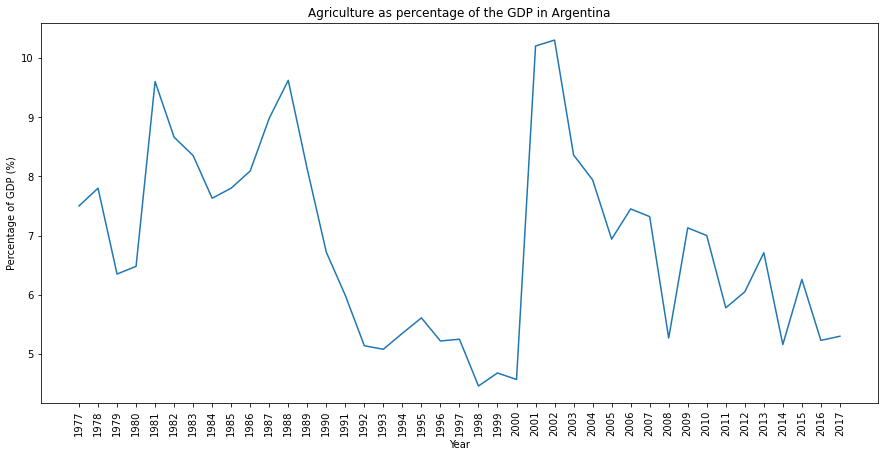

In [45]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.plot(agr_transposed['Argentina'], label = "Agriculture")

ax.set_title("Agriculture as percentage of the GDP in Argentina")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of GDP (%)")

plt.xticks(rotation = 90)
plt.show()

As we can see, the percentage of the production of Argentina which comes from agriculture is rather low, with a maximum of about 10%  between 2000 and 2003.

This seems inconsistent with the idea of the economy being based on agriculture, but let's continue our analysis.

Now, we'll look at the percentage of Argentina's production which comes from industrial activities.

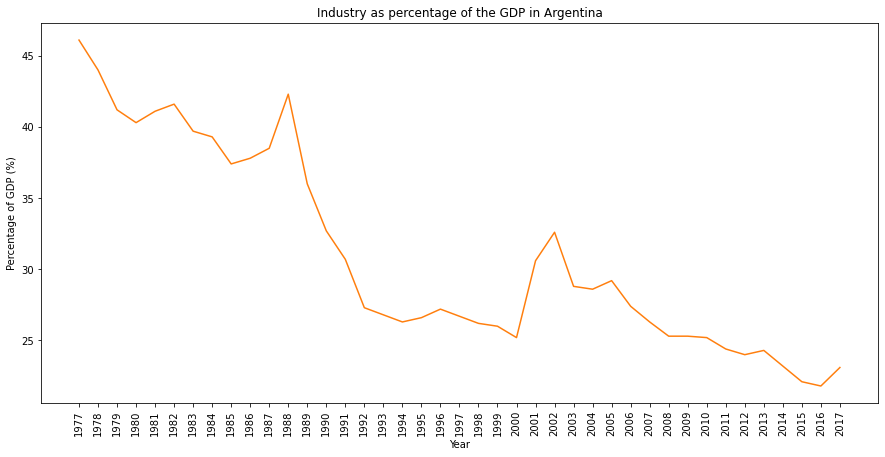

In [46]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.plot(ind_transposed['Argentina'], label = "Industry", color = "tab:orange")

ax.set_title("Industry as percentage of the GDP in Argentina")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of GDP (%)")

plt.xticks(rotation = 90)
plt.show()

As we can see, the percentage of Argentina's production coming from industry is significatively higher than the percentage coming from agriculture-based activities. Nevertheless, this percentage has been decreasing with time. Now, if this is the case, what is happening with wealth?

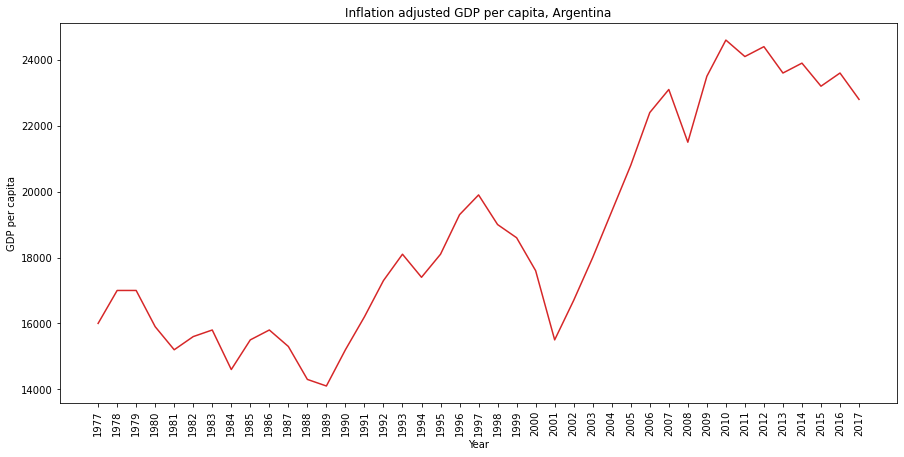

In [47]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.plot(inc_per_person_transposed['Argentina'], color = "tab:red")

ax.set_title("Inflation adjusted GDP per capita, Argentina")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per capita")
plt.xticks(rotation = 90)

#gdplist = list(range(16000, 24000, 1000))
#print(gdplist)
#plt.yticks(gdplist)
#ax.set(yticks=gdplist, yticklabels=gdplist)

plt.show()

In the above graph, we observe that the GDP per capita of Argentina has increased significantly -though rather inconsistently- through time.

This is not necessarily inconsistent with the commonplace view of a shifting to an industry-based economy being a good policy for maximising economic growth. The observed growth could respond to global factors like the improvement of technology, and to be happening _despite_ the economy having a weak industrial sector, instead of _thanks to it_. Nevertheless, the observed trend is definitively _easier to explain_ if the commonplace view is wrong.

We still have data to analise. What happens with services?

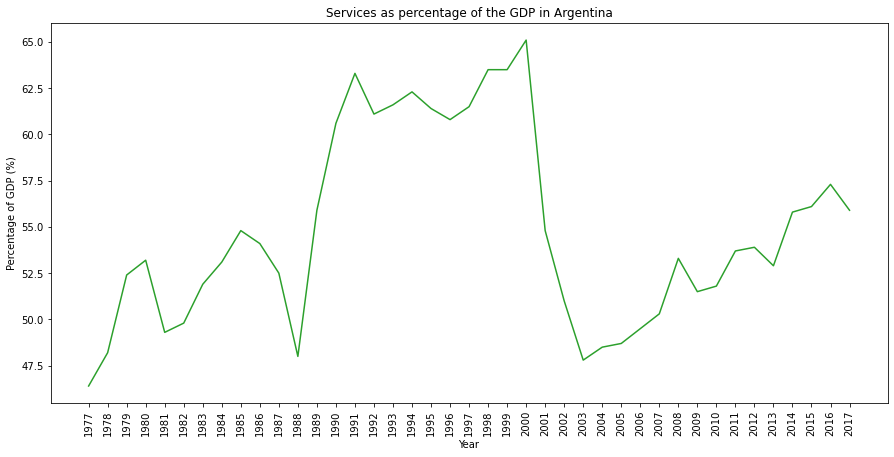

In [48]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.plot(serv_transposed['Argentina'], label = "Services", color = "tab:green")

ax.set_title("Services as percentage of the GDP in Argentina")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of GDP (%)")

plt.xticks(rotation = 90)
plt.show()

The percentage of the economy based on services is much higher!

At its maximum, services-based activities represented about 65% of the country's GDP, and in 2017 it was of more than 50%.

This seems to suggest that Argentina's economy is not based on agriculture _or_ on industry but on services.

Now we'll see the analised data in one graph. The following plot represents the different types of economic activity as percentages of the total for the country through 40 years, from 1977 to 2017:

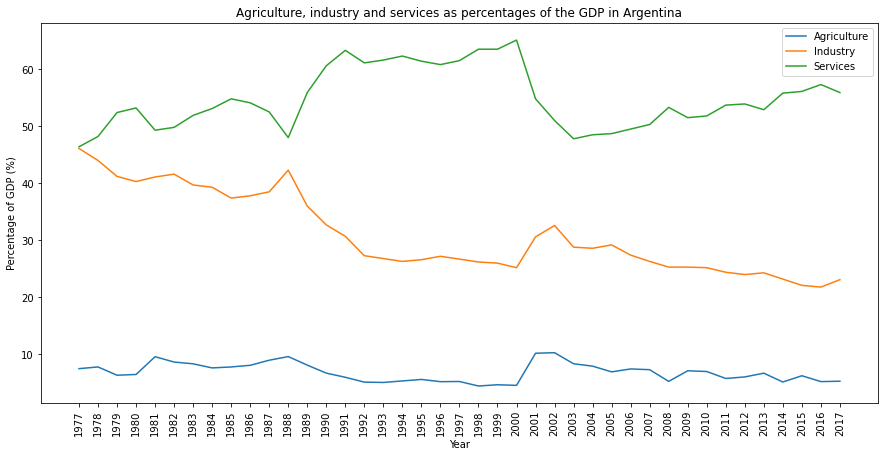

In [49]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.plot(agr_transposed['Argentina'], label = "Agriculture")
ax.plot(ind_transposed['Argentina'], label = "Industry")
ax.plot(serv_transposed['Argentina'], label = "Services")

ax.set_title("Agriculture, industry and services as percentages of the GDP in Argentina")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of GDP (%)")

plt.xticks(rotation = 90)
plt.legend()
plt.show()

As we can see in the graph, most of Argentina's production comes from industry and services-related activities. The agricultural activity represents a relatively small fraction of the economy. This has been true at least since the beggining of our data, in 1977. 

From 1977, Argentina's economy experiments a shift to services-related activities, while the relative weight of industry decreases and the relative weight of agricultural activities stands relatively small.



 We explore the relationship between this growth and the shifting between types of economic activity in the following graph: 

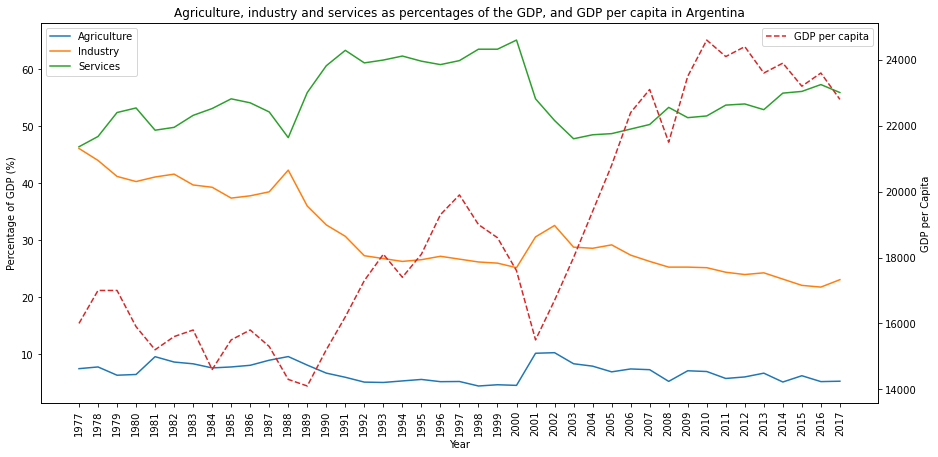

In [50]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.plot(agr_transposed['Argentina'], label = "Agriculture")
ax.plot(ind_transposed['Argentina'], label = "Industry")
ax.plot(serv_transposed['Argentina'], label = "Services")

ax.set_title("Agriculture, industry and services as percentages of the GDP, and GDP per capita in Argentina")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of GDP (%)")

plt.xticks(rotation = 90)
plt.legend()
plt.legend( loc = 'upper left')

ax2 = ax.twinx()
ax2.plot(inc_per_person_transposed[:]['Argentina'], '--', color = "tab:red", label = "GDP per capita")
ax2.set_ylabel('GDP per Capita')
plt.legend()
plt.legend( loc = 'upper right')
plt.show()

As we can see, what we observe is NOT an economic growth when the percentage of the economy based in industrial activity grows, but rather the opposite. An increase in the percentage of the economy based in industry related activity, and a decrease in the percentage of the economy based in services-related activity seems anti-correlated with economic growth. This becomes evident observing the depressions of ~1989 and of ~2001.

It important to observe again that correlation is not causation, and that the relationships being observed are complex. There are many possible interpretations of the data. Our analysis is focused on relative weights of different types of economic activities, but the shifts between those weights do not neccesarily imply a reallocation of resources. A decrease in the relative weight of industry related activities can be caused just by the appearance of new services-based activities with no shrink of Argentine industry, for example. The addendum of a new activity will imply certain economic growth.

Nevertheless, our data do not suggest that a _shift_ to an industry-based economy is the recipe for economic growth. The shifth which seems at least correlated with economic growth at local level seems to be the one from an agriculture-based economy to a services-based economy, and Argentina seems to be moving in that direction already.


### Is wealth related to having a high percentage of the economy based on industry?

Now we'll adopt a more global approach. In order to address our question, we'll analise the wealth of countries around the world against the percentage of their economies that is based on agricultural, industrial and services-related activities. 

In the following scatterplot, we can observe the relationship between GDP per capita and the percentage of the GDP based on agricultural activities. Each point is a country, and all the data correspond to 2017:

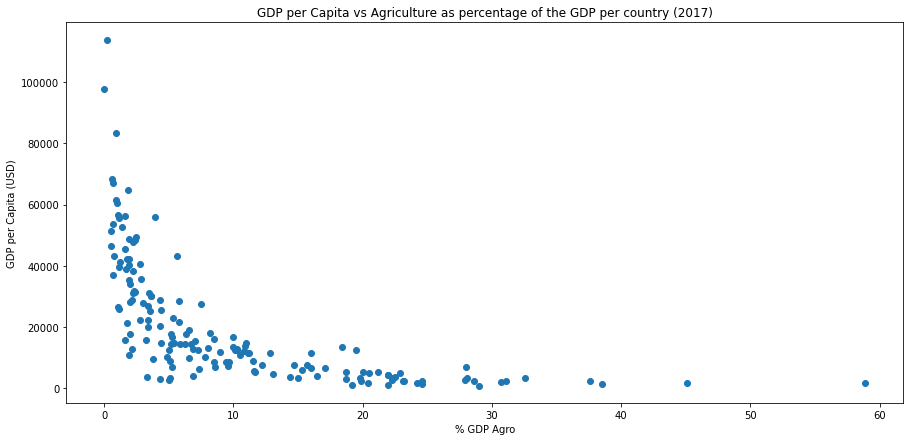

In [51]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(agr_transposed.loc['2017'], inc_per_person_transposed.loc['2017'])
ax.set_title("GDP per Capita vs Agriculture as percentage of the GDP per country (2017)")
ax.set_xlabel('% GDP Agro')
ax.set_ylabel('GDP per Capita (USD)');

We can observe a strong negative relationship between the percentage of the GDP based on agricultural activities and GDP per capita. Apparently, the economy of poor countries is much more based in agricultural activities than the economy of rich countries. It's important to have in mind that correlation _is not_ causation, and that the causal relationship between types of economic activities and wealth is probably complex and multidirectional. In this analysis, we deal with _correlations_ and do not attempt to infer causations from them. 

Causation is, of course, _suggested_ by correlation, but we left the task of exploring this suggestion to other, more in-depth analyses.

Now, in the following plot we observe the relationship between GDP per capita and the percentage of the GDP based on industrial activities. Again, each point is a country, and all the data corresponds to 2017:

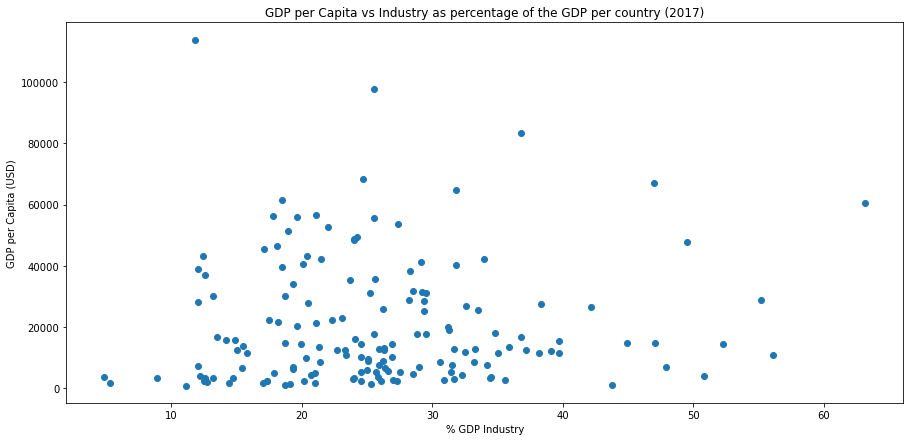

In [52]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(ind_transposed.loc['2017'], inc_per_person_transposed.loc['2017'])
ax.set_title("GDP per Capita vs Industry as percentage of the GDP per country (2017)")
ax.set_xlabel('% GDP Industry')
ax.set_ylabel('GDP per Capita (USD)');

As we can see, it's difficult to observe a relationship between high percentages of the economy based in industrial activities and wealth. The correlation is, at most, very weak.

Now we plot the percentages of the GDP of countries around the world which are produced by services-related activities against the GDP per capita of those countries. Again, each point is a country and the data is from 2017:

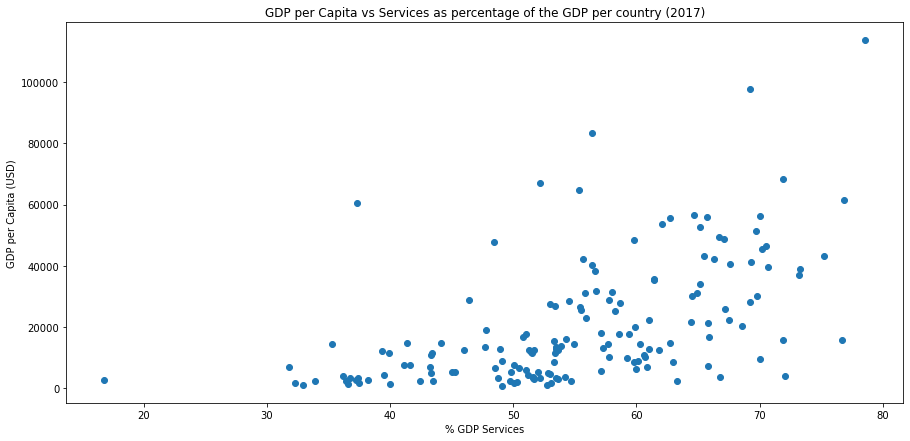

In [53]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(serv_transposed.loc['2017'], inc_per_person_transposed.loc['2017'])
ax.set_title("GDP per Capita vs Services as percentage of the GDP per country (2017)")
ax.set_xlabel('% GDP Services')
ax.set_ylabel('GDP per Capita (USD)');

As we can see, there is a positive, easily observable relationship between the factors considered. The positive relationship between high percentages of the economy based on services-related activities and wealth is not as strong as the negative relationship between high percentages of the economy based on agricultural activities, but it's definitely stronger than the relationship between industrialization and wealth.

The predictive power of the level of industrialization of an economy for the wealth of its country seems to be, if not plainly inexistent, rather low.   

The predictive power of the level of agricultural activity as percentage of the total economic activity seems to be the strongest, followed by the one of the level of services-related activity. 

To explore the consistency of this conclusions, we will analise the situation of the four poorest and the four richest economies in our data. 

The four poorest countries in our data are: 

In [54]:
inc_per_person_transposed.loc['2017'].sort_values().head(4)

country
Burundi              762.0
Malawi              1040.0
Congo, Dem. Rep.    1090.0
Niger               1200.0
Name: 2017, dtype: float64

And the four richest countries are:

In [55]:
inc_per_person_transposed.loc['2017'].sort_values().tail(4)

country
Switzerland     68200.0
Ireland         83400.0
Singapore       97700.0
Luxembourg     114000.0
Name: 2017, dtype: float64

We create the plots:

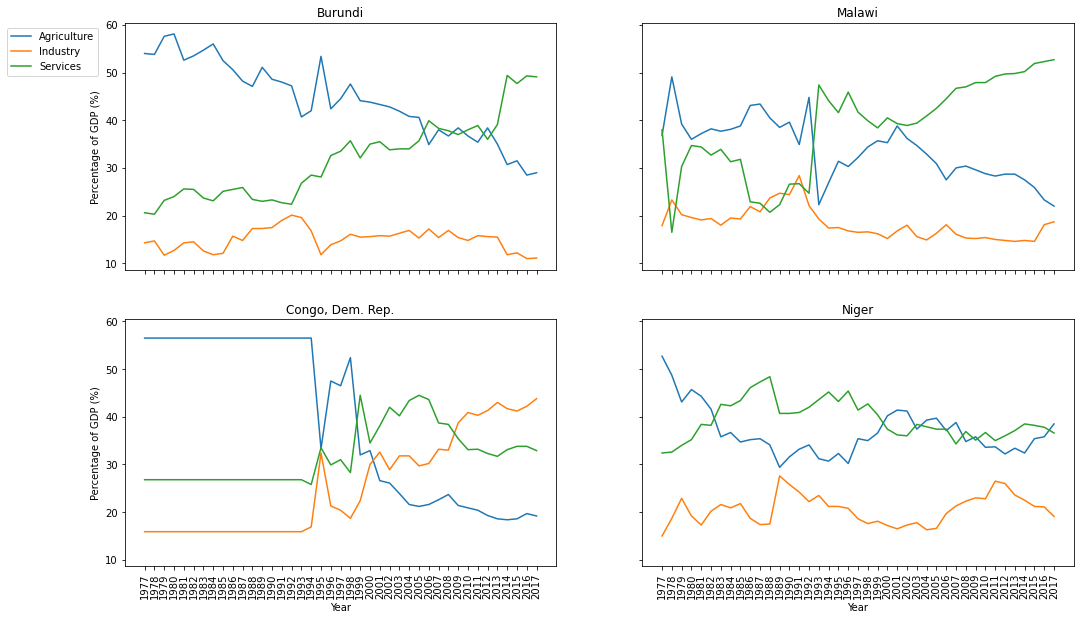

In [56]:
fig, ax = plt.subplots(2, 2, figsize = (17, 10), sharey = True, sharex = True)
#plt.xticks(rotation = 90)


ax[0][0].plot(agr_transposed['Burundi'], label = "Agriculture")
ax[0][0].plot(ind_transposed['Burundi'], label = "Industry")
ax[0][0].plot(serv_transposed['Burundi'], label = "Services")
ax[0][0].title.set_text('Burundi')
ax[0][0].legend()
ax[0][0].legend( loc = 'upper left')
ax[0][0].legend(bbox_to_anchor=(-0.05, 1))
ax[0][0].set_ylabel("Percentage of GDP (%)")
ax[0][0].tick_params('x', labelrotation = 90)

ax[0][1].plot(agr_transposed['Malawi'])
ax[0][1].plot(ind_transposed['Malawi'])
ax[0][1].plot(serv_transposed['Malawi'])
ax[0][1].title.set_text('Malawi')
ax[0][1].tick_params('x', labelrotation = 90)

ax[1][0].plot(agr_transposed['Congo, Dem. Rep.'])
ax[1][0].plot(ind_transposed['Congo, Dem. Rep.'])
ax[1][0].plot(serv_transposed['Congo, Dem. Rep.'])
ax[1][0].title.set_text('Congo, Dem. Rep.')
ax[1][0].tick_params('x', labelrotation = 90)
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Percentage of GDP (%)")

ax[1][1].plot(agr_transposed['Niger'])
ax[1][1].plot(ind_transposed['Niger'])
ax[1][1].plot(serv_transposed['Niger']);
ax[1][1].title.set_text('Niger')
ax[1][1].tick_params('x', labelrotation = 90)
ax[1][1].set_xlabel("Year");


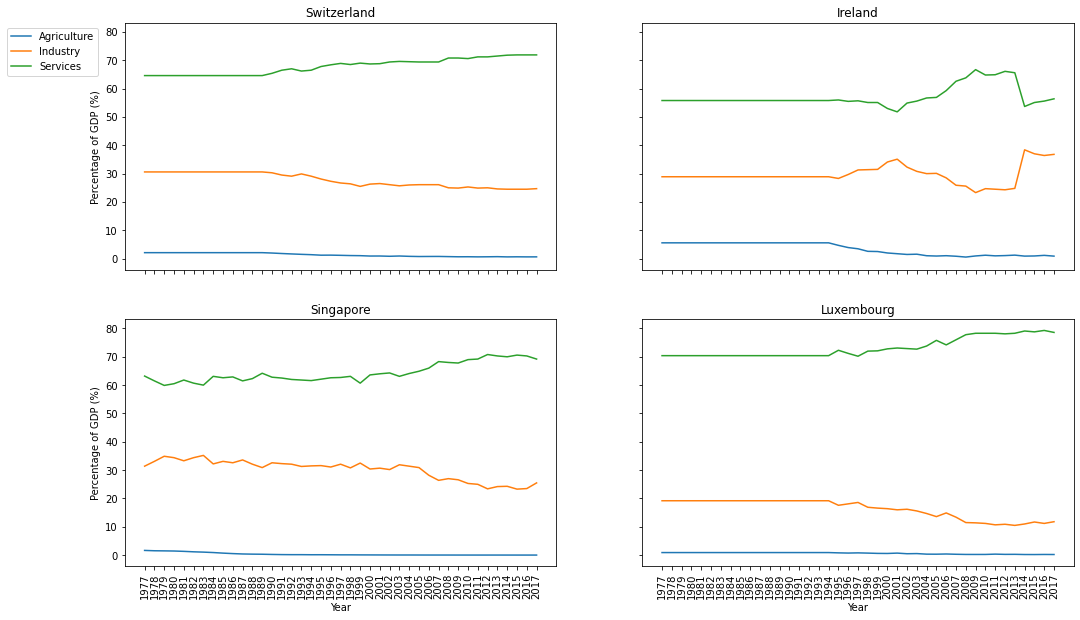

In [57]:
fig, ax = plt.subplots(2, 2, figsize = (17, 10), sharey = True, sharex = True)
plt.xticks(rotation = 90)
ax[0][0].plot(agr_transposed['Switzerland'], label = "Agriculture")
ax[0][0].plot(ind_transposed['Switzerland'], label = "Industry")
ax[0][0].plot(serv_transposed['Switzerland'], label = "Services")
ax[0][0].title.set_text('Switzerland')
ax[0][0].legend(bbox_to_anchor=(-0.05, 1))
ax[0][0].tick_params('x', labelrotation = 90)
ax[0][0].set_ylabel("Percentage of GDP (%)")

ax[0][1].plot(agr_transposed['Ireland'])
ax[0][1].plot(ind_transposed['Ireland'])
ax[0][1].plot(serv_transposed['Ireland'])
ax[0][1].title.set_text('Ireland')
ax[0][1].tick_params('x', labelrotation = 90)

plt.xticks(rotation = 90)
ax[1][0].plot(agr_transposed['Singapore'])
ax[1][0].plot(ind_transposed['Singapore'])
ax[1][0].plot(serv_transposed['Singapore'])
ax[1][0].title.set_text('Singapore')
ax[1][0].tick_params('x', labelrotation = 90)
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Percentage of GDP (%)")

plt.xticks(rotation = 90)
ax[1][1].plot(agr_transposed['Luxembourg'])
ax[1][1].plot(ind_transposed['Luxembourg'])
ax[1][1].plot(serv_transposed['Luxembourg']);
ax[1][1].title.set_text('Luxembourg')
ax[1][1].tick_params('x', labelrotation = 90)
ax[1][1].set_xlabel("Year");


And the results are consistent with our previous analysis. It is apparent that richer economies are fundamentally based on services, while in poorer economies there is a high relative importance of industry and agriculture.

<a id='conclusions'></a>
## Conclusions

As we observed: 

1. Argentina's economy does not seem to be based on agriculture, as the commonplace view says.

2. There was not a clear relationship between high percentages of the economy being related to industry and economic growth in Argentina during the years considered. 

3. At world scale, it does not seem that highly industry-based economies are particularly rich. What was observable was, first, a strong negative correlation between predominately agriculture-based economies and poverty, and second, a medium-strenght positive correlation between predominately services-based economies and high levels of wealth.

This suggests that shifting to an industry-based economy is not a recipe for economic growth in Argentina, thought it's important to remember that this is a suggestion based on the observation of correlations, and that more thoughtful and deep analyses should be done in order to determine if it's reasonable to infer causation.